In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

/Users/hoondori/pyenv/myenv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/hoondori/pyenv/myenv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


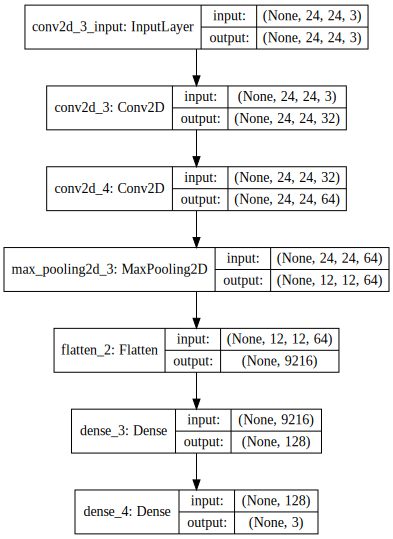

In [5]:
# model

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# visualize model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
# data from ImageDataGenerator

# train data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.5,
                                   zoom_range=[0.8, 2.0],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    './handwriting_shape/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './handwriting_shape/test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [11]:
# train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit_generator(
    train_generator,
    steps_per_epoch=15 * 10,
    epochs=50,
    validation_data=test_generator,
    validation_steps=5
)

Epoch 1/50
150/150 [==============================] - 7s 47ms/step - loss: 0.8943 - acc: 0.6133 - val_loss: 0.1146 - val_acc: 1.0000
Epoch 2/50
150/150 [==============================] - 6s 42ms/step - loss: 0.4231 - acc: 0.8489 - val_loss: 0.0269 - val_acc: 1.0000
Epoch 3/50
150/150 [==============================] - 6s 42ms/step - loss: 0.3111 - acc: 0.8844 - val_loss: 0.0209 - val_acc: 1.0000
Epoch 4/50
150/150 [==============================] - 6s 41ms/step - loss: 0.2097 - acc: 0.9200 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 5/50
150/150 [==============================] - 7s 48ms/step - loss: 0.2340 - acc: 0.9067 - val_loss: 0.0151 - val_acc: 1.0000
Epoch 6/50
150/150 [==============================] - 8s 50ms/step - loss: 0.1602 - acc: 0.9400 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 7/50
150/150 [==============================] - 6s 41ms/step - loss: 0.1957 - acc: 0.9378 - val_loss: 1.4477e-04 - val_acc: 1.0000
Epoch 8/50
150/150 [==============================] - 7s 49ms/ste

In [12]:
print("---Evaluate---")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

---Evaluate---
acc: 100.00%


In [13]:
print("---Predict---")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

---Predict---
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]]
